# Mapping references to the dictatorship in Brazilian streets
- Even though the Brazilian military dictatorship (1964-1985) took away the right of vote in the country, deported, tortured and killed dissidents, many public buildings and streets in Brazil still pay homage to them. Using data from Open Street Map, I will try to map these references -- and compare the results with other countries, like Chile and Argentina, that had their own bloody  'anos de chumbo' (lead years)

In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from shapely.geometry import Polygon
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
# It took 7 minutes to read it in. Good enough. The shapefile has as all the streets in Brazil
streets = gpd.read_file('brazil-latest-free.shp/gis.osm_roads_free_1.shp')

In [28]:
streets = streets[streets['name'].notnull()]

In [29]:
streets['name'] = streets['name'].str.lower()

In [30]:
# AGENTS OF THE DICTATORSHIP THAT COMMITED CRIMES AGAINST THE HUMAN RIGHTS, ACCORDING TO THE BRAZILIAN TRUTH COMISSION
# The names of the presidentes appear more than once, in order to capture streets that use only their last names.

In [31]:
# MISSING OR KILLED, ACCORDING TO THE BRAZILIAN TRUTH COMISSION:
# Source: http://www1.folha.uol.com.br/poder/2014/12/1560655-veja-a-lista-de-mortos-e-desaparecidos-do-regime-militar.shtml
missing_killed = [
'Abelardo Rausch de Alcântara',
'Abílio Clemente Filho',
'Adauto Freire da Cruz',
'Aderval Alves Coqueiro',
'Adriano Fonseca Filho',
'Afonso Henrique Martins Saldanha',
'Aides Dias de Carvalho',
'Albertino José de Farias',
'Alberto Aleixo',
'Alceri Maria Gomes da Silva',
'Aldo de Sá Brito Souza Neto',
'Alex de Paula Xavier Pereira',
'Alexander José Ibsen Voerões',
'Alexandre Vannucchi Leme',
'Alfeu de Alcântara Monteiro',
'Almir Custódio de Lima',
'Aluísio Palhano Pedreira Ferreira',
'Alvino Ferreira Felipe',
'Amaro Felix Pereira',
'Amaro Luiz de Carvalho',
'Ana Maria Nacinovic Corrêa',
'Ana Rosa Kucinski Silva',
'Anatália de Souza Melo Alves',
'André Grabois',
'Angelina Gonçalves',
'Ângelo Arroyo',
'Ângelo Cardoso da Silva',
'Ângelo Pezzuti da Silva',
'Antogildo Pascoal Viana',
'Antônio Alfredo de Lima',
'Antônio Bem Cardoso',
'Antônio Benetazzo',
'Antônio Carlos Bicalho Lana',
'Antônio Carlos Monteiro Teixeira',
'Antônio Carlos Nogueira Cabral',
'Antônio Carlos Silveira Alves',
'Antônio de Araújo Veloso',
'Antônio de Pádua Costa',
'Antônio dos Três Reis de Oliveira',
'Antonio Ferreira Pinto',
'Antonio Graciani',
'Antônio Guilherme Ribeiro Ribas',
'Antônio Henrique Pereira Neto',
'Antônio Joaquim de Souza Machado',
'Antônio José dos Reis',
'Antonio Luciano Pregoni',
'Antônio Marcos Pinto de Oliveira',
'Antônio Raymundo de Lucena',
'Antônio Sérgio de Mattos',
'Antônio Teodoro de Castro',
'Ari da Rocha Miranda',
'Ari de Oliveira Mendes Cunha',
'Ari Lopes de Macêdo',
'Arildo Valadão',
'Armando Teixeira Fructuoso',
'Arnaldo Cardoso Rocha',
'Arno Preis',
'Ary Abreu Lima da Rosa',
'Ary Cabrera Prates',
'Augusto Soares da Cunha',
'Aurea Eliza Pereira',
'Aurora Maria Nascimento Furtado',
'Avelmar Moreira de Barros',
'Aylton Adalberto Mortati',
'Benedito Gonçalves',
'Benedito Pereira Serra',
'Bergson Gurjão Farias',
'Bernardino Saraiva',
'Boanerges de Souza Massa',
'Caiupy Alves de Castro',
'Carlos Alberto Soares de Freitas',
'Carlos Eduardo Pires Fleury',
'Carlos Lamarca',
'Carlos Marighella',
'Carlos Nicolau Danielli',
'Carlos Roberto Zanirato',
'Carlos Schirmer',
'Carmem Jacomini',
'Cassimiro Luiz de Freitas',
'Catarina Helena Abi-Eçab',
'Célio Augusto Guedes',
'Celso Gilberto de Oliveira',
'Chael Charles Schreier',
'Cilon Cunha Brun',
'Ciro Flávio Salazar de Oliveira',
'Cloves Dias de Amorim',
'Custódio Saraiva Neto',
'Daniel José de Carvalho',
'Daniel Ribeiro Callado',
'Darcy José dos Santos Mariante',
'David Capistrano da Costa',
'David de Souza Meira',
'Dênis Casemiro',
'Dermeval da Silva Pereira',
'Devanir José de Carvalho',
'Dilermano Mello do Nascimento',
'Dimas Antônio Casemiro',
'Dinaelza Santana Coqueiro',
'Dinalva Oliveira Teixeira',
'Divino Ferreira de Souza',
'Divo Fernandes d\'Oliveira',
'Djalma Carvalho Maranhão',
'Dorival Ferreira',
'Durvalino de Souza',
'Edgar de Aquino Duarte',
'Edmur Péricles Camargo',
'Edson Luiz Lima Souto',
'Edson Neves Quaresma',
'Edu Barreto Leite',
'Eduardo Antônio da Fonseca',
'Eduardo Collen Leite',
'Eduardo Collier Filho',
'Eiraldo de Palha Freire',
'Eliane Martins',
'Elmo Corrêa',
'Elson Costa',
'Elvaristo Alves da Silva',
'Emmanuel Bezerra dos Santos',
'Enrique Ernesto Ruggia',
'Epaminondas Gomes de Oliveira',
'Eremias Delizoicov',
'Eudaldo Gomes da Silva',
'Evaldo Luiz Ferreira de Souza',
'Ezequias Bezerra da Rocha',
'Feliciano Eugênio Neto',
'Félix Escobar Sobrinho',
'Fernando Augusto da Fonseca',
'Fernando Borges de Paula Ferreira',
'Fernando da Silva Lembo',
'Fernando Santa Cruz',
'Flávio Carvalho Molina',
'Francisco das Chagas Pereira',
'Francisco Emanuel Penteado',
'Francisco José de Oliveira',
'Francisco Manoel Chaves',
'Francisco Seiko Okama',
'Francisco Tenório Júnior',
'Frederico Eduardo Mayr',
'Gastone Lúcia Carvalho Beltrão',
'Gelson Reicher',
'Geraldo Bernardo da Silva',
'Geraldo da Rocha Gualberto',
'Gerardo Magela Fernandes Torres da Costa',
'Gerosina Silva Pereira',
'Gerson Theodoro de Oliveira',
'Getulio de Oliveira Cabral',
'Gilberto Olímpio Maria',
'Gildo Macedo Lacerda',
'Gilson Miranda',
'Grenaldo de Jesus da Silva',
'Guido Leão',
'Guilherme Gomes Lund',
'Gustavo Buarque Schiller',
'Hamilton Fernando da Cunha',
'Hamilton Pereira Damasceno',
'Helber José Gomes Goulart',
'Hélcio Pereira Fortes',
'Helenira Rezende de Souza Nazareth',
'Heleny Teles Ferreira Guariba',
'Hélio Luiz Navarro de Magalhães',
'Henrique Cintra Ferreira Ornellas',
'Higino João Pio',
'Hiram de Lima Pereira',
'Hiroaki Torigoe',
'Honestino Monteiro Guimarães',
'Horacio Domingo Campiglia',
'Iara Iavelberg',
'Idalísio Soares Aranha Filho',
'Ieda Santos Delgado',
'Iguatemi Zuchi Teixeira',
'Inocêncio Pereira Alves',
'Íris Amaral',
'Ishiro Nagami',
'Ísis Dias de Oliveira',
'Ismael Silva de Jesus',
'Israel Tavares Roque',
'Issami Nakamura Okano',
'Itair José Veloso',
'Iuri Xavier Pereira',
'Ivan Mota Dias',
'Ivan Rocha Aguiar',
'Jaime Petit da Silva',
'James Allen da Luz',
'Jana Moroni Barroso',
'Jane Vanini',
'Jarbas Pereira Marques',
'Jayme Amorim Miranda',
'Jean Henri Raya',
'Jeová Assis Gomes',
'João Alfredo Dias',
'João Antônio Santos Abi-Eçab',
'João Barcellos Martins',
'João Batista Franco Drummond',
'João Batista Rita',
'João Bosco Penido Burnier',
'João Carlos Cavalcanti Reis',
'João Carlos Haas Sobrinho',
'João de Carvalho Barros',
'João Domingues da Silva',
'João Gualberto Calatrone',
'João Leonardo da Silva Rocha',
'João Lucas Alves',
'João Massena Melo',
'João Mendes Araújo',
'João Pedro Teixeira',
'João Roberto Borges de Souza',
'Joaquim Alencar de Seixas',
'Joaquim Câmara Ferreira',
'Joaquim Pires Cerveira',
'Joaquinzão',
'Joel José de Carvalho',
'Joel Vasconcelos Santos',
'Joelson Crispim',
'Jonas José de Albuquerque Barros',
'Jorge Alberto Basso',
'Jorge Aprígio de Paula',
'Jorge Leal Gonçalves Pereira',
'Jorge Oscar Adur',
'José Bartolomeu Rodrigues de Souza',
'José Campos Barreto',
'José Carlos da Costa',
'José Carlos Novaes da Mata Machado',
'José Dalmo Guimarães Lins',
'José de Oliveira',
'José de Souza',
'José Ferreira de Almeida',
'José Gomes Teixeira',
'José Guimarães',
'José Humberto Bronca',
'José Idésio Brianezi',
'José Inocêncio Barreto',
'José Isabel do Nascimento',
'José Jobim',
'José Júlio de Araújo',
'José Lavecchia',
'José Lima Piauhy Dourado',
'José Manoel da Silva',
'José Maria Ferreira Araújo',
'José Maurílio Patrício',
'José Maximino de Andrade Netto',
'José Mendes de Sá Roriz',
'José Milton Barbosa',
'José Montenegro de Lima',
'José Nobre Parente',
'José Porfírio de Souza',
'José Raimundo da Costa',
'José Roberto Arantes de Almeida',
'José Roberto Spiegner',
'José Roman',
'José Sabino',
'José Silton Pinheiro',
'José Soares dos Santos',
'José Toledo de Oliveira',
'José Wilson Lessa Sabbag',
'Juan Antonio Carrasco Forrastal',
'Juares Guimarães de Brito',
'Juarez Rodrigues Coelho',
'Juvelino Andrés Carneiro da Fontoura Gularte',
'Kleber Lemos da Silva',
'Labibe Elias Abduch',
'Lauriberto José Reyes',
'Leopoldo Chiapetti',
'Líbero Giancarlo Castiglia',
'Lígia Maria Salgado Nóbrega',
'Lincoln Bicalho Roque',
'Lincoln Cordeiro Oest',
'Lorenzo Ismael Viñas',
'Lourdes Maria Wanderley Pontes',
'Lourenço Camelo de Mesquita',
'Lourival Moura Paulino',
'Lúcia Maria de Souza',
'Lucimar Brandão Guimarães',
'Lucindo Costa',
'Lúcio Petit da Silva',
'Luís Alberto Andrade de Sá e Benevides',
'Luisa Augusta Garlippe',
'Luiz Affonso Miranda da Costa Rodrigues',
'Luiz Almeida Araújo',
'Luiz Antônio Santa Bárbara',
'Luiz Carlos Augusto',
'Luiz Carlos Almeida',
'Luiz Eduardo da Rocha Merlino',
'Luiz Eurico Tejera Lisbôa',
'Luiz Fogaça Balboni',
'Luiz Ghilardini',
'Luiz Gonzaga dos Santos',
'Luiz Hirata',
'Luiz Ignácio Maranhão Filho',
'Luiz José da Cunha',
'Luiz Paulo da Cruz Nunes',
'Luiz Renato do Lago Faria',
'Luiz Renato Pires de Almeida',
'Luiz René Silveira e Silva',
'Luiz Vieira',
'Luiza Garlippe',
'Lyda Monteiro da Silva',
'Manoel Aleixo da Silva',
'Manoel Alves de Oliveira',
'Manoel Custódio Martins',
'Manoel Fiel Filho',
'Manoel José Nunes Mendes de Abreu',
'Manoel José Nurchis',
'Manoel Lisboa de Moura',
'Manoel Raimundo Soares',
'Manoel Rodrigues Ferreira',
'Márcio Beck Machado',
'Marco Antônio Brás de Carvalho',
'Marco Antônio da Silva Lima',
'Marco Antônio Dias Baptista',
'Marcos José de Lima',
'Marcos Nonato da Fonseca',
'Margarida Maria Alves',
'Maria Ângela Ribeiro',
'Maria Augusta Thomaz',
'Maria Auxiliadora Lara Barcelos',
'Maria Célia Corrêa',
'Maria Lúcia Petit da Silva',
'Maria Regina Lobo Leite de Figueiredo',
'Maria Regina Marcondes Pinto',
'Mariano Joaquim da Silva',
'Marilena Villas Boas',
'Mário Alves de Souza Vieira',
'Mário de Souza Prata',
'Massafumi Yoshinaga',
'Maurício Grabois',
'Maurício Guilherme da Silveira',
'Merival Araújo',
'Miguel Pereira dos Santos',
'Miguel Sabat Nuet',
'Milton Soares de Castro',
'Míriam Lopes Verbena',
'Napoleão Felipe Biscaldi',
'Neide Alves dos Santos',
'Nelson José de Almeida',
'Nelson Lima Piauhy Dourado',
'Nelson de Souza Kohl',
'Nestor Vera',
'Newton Eduardo de Oliveira',
'Nilda Carvalho Cunha',
'Nilton Rosa da Silva',
'Norberto Armando Habeger',
'Norberto Nehring',
'Odijas Carvalho de Souza',
'Olavo Hanssen',
'Onofre Ilha Dornelles',
'Onofre Pinto',
'Orlando da Silva Rosa Bonfim Júnior',
'Orlando Momente',
'Ornalino Cândido da Silva',
'Orocílio Martins Gonçalves',
'Osvaldo Orlando da Costa',
'Otávio Soares Ferreira da Cunha',
'Otoniel Campo Barreto',
'Paschoal Souza Lima',
'Pauline Reichstul',
'Paulo César Botelho Massa',
'Paulo Costa Ribeiro Bastos',
'Paulo de Tarso Celestino',
'Paulo Guerra Tavares',
'Paulo Mendes Rodrigues',
'Paulo Roberto Pereira Marques',
'Paulo Stuart Wright',
'Paulo Torres Gonçalves',
'Pedro Alexandrino de Oliveira Filho',
'Pedro Carretel',
'Pedro Domiense de Oliveira',
'Pedro Inácio de Araújo',
'Pedro Jerônimo de Souza',
'Pedro Ventura Felipe de Araújo Pomar',
'Péricles Gusmão Régis',
'Raimundo Eduardo da Silva',
'Raimundo Ferreira Lima',
'Raimundo Gonçalves Figueiredo',
'Raimundo Nonato Paz',
'Ramires Maranhão do Vale',
'Ranúsia Alves Rodrigues',
'Raul Amaro Nin Ferreira',
'Reinaldo Silveira Pimenta',
'Roberto Cietto',
'Roberto Macarini',
'Roberto Rascardo Rodrigues',
'Rodolfo de Carvalho Troiano',
'Ronaldo Mouth Queiroz',
'Rosalindo Souza',
'Rubens Beyrodt Paiva',
'Rui Osvaldo Aguiar Pfützenreuter',
'Ruy Carlos Vieira Berbert',
'Ruy Frazão Soares',
'Santo Dias da Silva',
'Sebastião Gomes dos Santos',
'Sebastião Tomé da Silva',
'Sérgio Roberto Corrêa',
'Sérgio Landulfo Furtado',
'Severino Elias de Mello',
'Severino Viana Colou',
'Sidney Fix Marques dos Santos',
'Silvano Soares dos Santos',
'Solange Lourenço Gomes',
'Soledad Barret Viedma',
'Sônia Maria Lopes de Moraes Angel Jones',
'Stuart Edgart Angel Jones',
'Suely Yumiko Kanayama',
'Telma Regina Cordeiro Corrêa',
'Therezinha Viana de Assis',
'Thomaz Antônio da Silva Meirelles Neto',
'Tito de Alencar Lima',
'Tobias Pereira Júnior',
'Túlio Roberto Cardoso Quintiliano',
'Uirassu de Assis Batista',
'Umberto Albuquerque Câmara Neto',
'Valdir Sales Saboya',
'Vandick Reidner Pereira Coqueiro',
'Virgílio Gomes da Silva',
'Vitor Carlos Ramos',
'Vítor Luíz Papandreu',
'Vitorino Alves Moitinho',
'Vladimir Herzog',
'Walkíria Afonso Costa',
'Walter de Souza Ribeiro',
'Walter Kenneth Nelson Fleury',
'Walter Ribeiro Novaes',
'Wânio José de Mattos',
'Wilson Silva',
'Wilson Souza Pinheiro',
'Wilton Ferreira',
'Yoshitane Fujimori',
'Zoé Lucas de Brito Filho',
'Zuleika Angel Jones']

In [32]:
# Reading the CSV with the convicted criminals I got from the official document of the Brazilian Truth Comission
df_criminals = pd.read_csv('pdf-truth-comission/dictatorship-criminals.csv', header=None)

In [33]:
# Renaming columns
df_criminals.columns = ['number','name','years-of-life','position']

In [34]:
# Transforming one of the columns into a list of all criminals
dictatorship_criminals = df_criminals['name'].tolist()

In [35]:
# Getting rid of the extra quotation marks
dictatorship_criminals = [name.replace("'","") for name in dictatorship_criminals]

In [36]:
# Appending the last name of the generals -- which are used in many streets alone - to the list.
for name in ['Médici','Costa e Silva','Geisel','João Figueiredo','Castello Branco','Castello Branco']:
    dictatorship_criminals.append(name)

In [37]:
#Getting rid of extra spaces
dictatorship_criminals = [name.strip() for name in dictatorship_criminals]

In [38]:
# Making everything lowercase
dictatorship_criminals = [name.lower() for name in dictatorship_criminals]
missing_killed = [name.lower() for name in missing_killed]

In [39]:
# Creating a regular expression to capture all the streets tha END with the name of one of the criminals
regex_criminals = "$|".join(dictatorship_criminals)+'$'

In [40]:
# Creating a regular expression to capture all the streets tha END with the name of one of the victims
regex_victims = "$|".join(missing_killed)+'$'

In [41]:
# Getting a shape file with the brazilian states
brazil = gpd.read_file(r'C:\Users\Avell\Desktop\the-lede-program\data-and-databases\final-project\gender-map\shapefiles\BR\BRUFE250GC_SIR.shp',encoding='Latin5')

In [42]:
streets[streets['name'].str.contains(regex_criminals)].groupby('name')['code'].value_counts().sort_values()

name                                         code
1a travessa general costa e silva            5122      1
rua general arthur da costa e silva          5122      1
rua garrastazu médici                        5122      1
rua galdino josé rodrigues                   5122      1
rua gal. orlando geisel                      5122      1
rua gabriel josé rodrigues                   5122      1
rua farmacêutico joão medeiros               5122      1
rua expedicionário sebastião cândido         5122      1
rua evaristo josé rodrigues                  5122      1
rua eudóxia castello branco                  5122      1
rua ernesto geisel                           5115      1
rua engracia costa e silva                   5122      1
rua emilio garrastazu médici                 5122      1
rua eduardo rodrigues                        5122      1
rua edgar josé rodrigues                     5122      1
rua dário josé rodrigues                     5122      1
rua general sérgio de oliveira        

In [43]:
streets[streets['name'].str.contains(regex_criminals)].groupby('name')['code'].value_counts().sort_values().shape

(398,)

In [44]:
streets[streets['name'].str.contains(regex_victims)].groupby('name')['code'].value_counts().sort_values()

name                                  code
alameda benedito josé de souza        5122     1
rua leonardo josé guimarães           5122     1
rua laurindo josé de souza            5122     1
rua ladisleu josé de souza            5122     1
rua júlio josé de souza               5122     1
rua joão luiz vieira                  5122     1
rua joão lucas alves                  5122     1
rua joão leonardo da silva rocha      5122     1
rua joão domingues da silva           5122     1
rua joão de carvalho barros           5122     1
rua leopoldo chiapetti                5122     1
rua joão carlos haas sobrinho         5121     1
rua joão batista rita                 5115     1
rua josé roman                        5122     1
rua josé raimundo da costa            5122     1
rua josé maurílio patrício            5122     1
rua josé lima piauhy dourado          5122     1
rua josé júlio de araújo              5122     1
rua josé ferreira de almeida          5122     1
rua josé de oliveira      

In [45]:
streets[streets['name'].str.contains(regex_victims)].groupby('name')['code'].value_counts().sort_values().shape

(486,)

In [46]:
# Some of those contained homonims and very common names. I manually filtered those, to make as sure as possible that they refered to the right person.
# Only those streets that were more likely than not to refer to the right people were included in this new lists.
# TO DO: STILL NEED TO FILTER SOME OF THE CRIMINALS NAMES.

In [47]:
missing_killed_streets = ['rua joão lucas alves',
'rua joão leonardo da silva rocha',
'rua joão domingues da silva',
'rua joão de carvalho barros',
'rua leopoldo chiapetti',
'rua joão carlos haas sobrinho',
'rua joão batista rita',
'rua josé roman',
'rua josé raimundo da costa',
'rua josé maurílio patrício',
'rua josé lima piauhy dourado',
'rua josé júlio de araújo',
'rua josé ferreira de almeida',
'rua josé de oliveira',
'rua joão carlos cavalcanti reis',
'rua josé de oliveira',
'rua maria célia corrêa',
'rua margarida maria alves',
'rua marco antônio da silva lima',
'rua manoel fiel filho',
'rua manoel aleixo da silva',
'rua lúcio petit da silva',
'rua lúcia maria de souza',
'rua luiz vieira',
'rua luiz hirata',
'rua luiz carlos almeida',
'rua jorge leal gonçalves pereira',
'rua jorge alberto basso',
'rua joaquim câmara ferreira',
'rua geraldo da rocha gualberto',
'rua frei tito de alencar lima',
'rua francisco josé de oliveira',
'rua flávio carvalho molina',
'rua fernando augusto da fonseca',
'rua guilherme gomes lund',
'rua gustavo buarque schiller',
'rua jane vanini',
'rua jaime petit da silva',
'rua ivan rocha aguiar',
'rua itair josé veloso',
'rua idalísio soares aranha filho',
'rua iara iavelberg',
'rua hélcio pereira fortes',
'viaduto honestino monteiro guimarães',
'rua hiram de lima pereira',
'rua higino joão pio',
'rua walter de souza ribeiro',
'rua vitorino alves moitinho',
'rua virgílio josé de oliveira',
'rua universitário joão roberto borges de souza',
'rua uirassu de assis batista',
'rua: margarida maria alves',
'servidão josé de oliveira',
'via de pedestre arno preis',
'travessa ângelo arroyo',
'travessa miguel pereira dos santos',
'servidão capitão carlos lamarca',
'travessa manoel rodrigues ferreira',
'travessa josé guimarães',
'travessa josé de souza',
'travessa angelina gonçalves',
'travessa margarida maria alves',
'rua tenente josé ferreira de almeida',
'rua sérgio landulfo furtado',
'rua nelson josé de almeida',
'rua mário de souza prata',
'rua paschoal souza lima',
'rua paulo césar botelho massa',
'rua sebastião tomé da silva',
'rua ranúsia alves rodrigues',
'rua raimundo eduardo da silva',
'rua paulo mendes rodrigues',
'rua humberto albuquerque câmara neto',
'rua eremias delizoicov',
'rua antônio carlos bicalho lana',
'rua antonio ferreira pinto',
'rua andré grabois',
'rua alvino ferreira felipe',
'rua alvino ferreira felipe',
'rua bernardino saraiva',
'rua aurora maria nascimento furtado',
'rua arno preis',
'avenida sérgio landulfo furtado',
'avenida paulo costa ribeiro bastos',
'avenida josé de souza',
'avenida joaquim câmara ferreira',
'avenida itair josé veloso',
'avenida doutor joão carlos haas sobrinho',
'avenida andré grabois',
'avenida a josé de souza',
'alameda josé de oliveira',
'david capistrano da costa',
'rua adriano fonseca filho',
'rua  josé de souza',
'rodovia paulo stuart wright',
'contorno rodoviário joão pedro teixeira',
'r. josé de oliveira ',
'praça paulo césar botelho massa',
'praça manoel fiel filho',
'praça emídio josé de souza',
'luiz vieira',
'estrada josé guimarães',
'vila josé guimarães',
'rua custódio saraiva neto',
'rua carlos marighella',
'rua david capistrano da costa',
'rua carlos marighella',
'rua carlos schirmer',
'rua eduardo antônio da fonseca',
'rua dorival ferreira',
'rua elmo corrêa',
'rodovia paulo stuart wright',
'rua alceri maria gomes da silva',
'rua ieda santos delgado',
'avenida daniel josé de carvalho',
'rodovia paulo stuart wright',
'rua guido leão',
'rua virgílio gomes da silva',
'avenida raimundo eduardo da silva',
'avenida sérgio landulfo furtado',
'rua frederico eduardo mayr',
'avenida josé guimarães',
'rua ezequias bezerra da rocha',
'ponte santo dias da silva',
'praça paulo stuart wright',
'rua rodolfo de carvalho troiano',
'rua reinaldo silveira pimenta',
'rua ramires maranhão do vale',
'rua eduardo collier filho',
'rua josé toledo de oliveira',
'rua arnaldo cardoso rocha',
'rua maria augusta thomaz',
'rua joaquim pires cerveira',
'rua arildo valadão',
'rua manoel rodrigues ferreira',
'rua josé de oliveira',
'rua luiz gonzaga dos santos',
'rua lourdes maria wanderley pontes',
'rua josé milton barbosa',
'rua bergson gurjão farias',
'rua josé roberto arantes de almeida',
'rua joão carlos haas sobrinho',
'rua maria regina marcondes pinto',
'rua manoel lisboa de moura',
'rua ivan mota dias',
'rua angelina gonçalves',
'avenida santo dias da silva',
'avenida ruy frazão soares',
'rua nelson costa',
'rua josé humberto bronca',
'rua vladimir herzog',
'avenida josé manoel da silva',
'rua lyda monteiro da silva',
'rua joão pedro teixeira',
'rua josé montenegro de lima',
'avenida dorival ferreira',
'rua joão bosco penido burnier',
'rua joão batista rita',
'rua paulo stuart wright',
'rua osvaldo orlando da costa',
'rua gilberto olímpio maria',
'rua carlos marighella',
'rua raimundo gonçalves figueiredo',
'rua josé campos barreto',
'rua pedro inácio de araújo',
'rua raimundo ferreira lima',
'rua capitão carlos lamarca',
'rua josé soares dos santos',
'rua vladimir herzog',
'rua miguel pereira dos santos',
'travessa josé de oliveira',
'rua orlando momente',
'rua luiz vieira',
'rua elson costa',
'rua josé sabino',
'rua francisco josé de oliveira',
'rua márcio beck machado',
'rua maurício grabois',
'rua margarida maria alves',
'rua josé porfírio de souza',
'rua carlos lamarca',
'rua josé manoel da silva',
'rua benedito gonçalves',
'avenida arildo valadão',
'rua manoel alves de oliveira',
'rua josé guimarães',
'rua josé de souza',
'rua josé de oliveira',]

['rua joão lucas alves',
 'rua joão leonardo da silva rocha',
 'rua joão domingues da silva',
 'rua joão de carvalho barros',
 'rua leopoldo chiapetti',
 'rua joão carlos haas sobrinho',
 'rua joão batista rita',
 'rua josé roman',
 'rua josé raimundo da costa',
 'rua josé maurílio patrício',
 'rua josé lima piauhy dourado',
 'rua josé júlio de araújo',
 'rua josé ferreira de almeida',
 'rua josé de oliveira',
 'rua joão carlos cavalcanti reis',
 'rua josé de oliveira',
 'rua maria célia corrêa',
 'rua margarida maria alves',
 'rua marco antônio da silva lima',
 'rua manoel fiel filho',
 'rua manoel aleixo da silva',
 'rua lúcio petit da silva',
 'rua lúcia maria de souza',
 'rua luiz vieira',
 'rua luiz hirata',
 'rua luiz carlos almeida',
 'rua jorge leal gonçalves pereira',
 'rua jorge alberto basso',
 'rua joaquim câmara ferreira',
 'rua geraldo da rocha gualberto',
 'rua frei tito de alencar lima',
 'rua francisco josé de oliveira',
 'rua flávio carvalho molina',
 'rua fernando au

In [48]:
dictatorship_criminals_streets = ['rodovia castelo branco',
'rodovia presidente castelo branco'
'1a travessa general costa e silva',
'rua general arthur da costa e silva',
'rua garrastazu médici',
'rua ernesto geisel',
'rua emilio garrastazu médici',
'rua eduardo rodrigues',
'rua general vicente de paulo dale coutinho',
'rua joão rodrigues pinheiro',
'rua josé rodrigues',
'rua josé gonçalves dias',
'rua josé antônio de mello',
'rua josé rodrigues',
'rua central presidente médici',
'rua brig. eduardo gomes',
'rua coronel augusto fernandes maia',
'rua coronel josé ferreira da silva',
'rua doutor alcides cintra bueno filho',
'rua ditador médici',
'viaduto presidente costa e silva',
'rua costa e silva',
'rua coronel joão andré dias paredes',
'rua da escola costa e silva',
'rua luiz alves ferreira',
'segunda travessa joão figueiredo',
'tv. josé rodrigues',
'travessa marechal costa e silva',
'travessa josé rodrigues',
'travessa general costa e silva',
'travessa costa e silva',
'travessa brigadeiro eduardo gomes',
'travessa alfredo magalhães',
'trav. ernesto geisel',
'travessa eduardo rodrigues',
'rua ministro costa e silva',
'rua mario borges',
'rua marechal eduardo gomes',
'rua marechal costa e silva',
'rua mal. artur costa e silva',
'rua marechal do ar eduardo gomes',
'rua presidente emilio médici',
'rua presidente costa e silva',
'rua presidente arthur de costa e silva',
'rua presidente arthur costa e silva',
'rua perimetral eduardo gomes',
'praça joão medeiros',
'praça joão medeiros',
'praça marechal-do-ar eduardo gomes',
'praça presidente costa e silva',
'avenida josé ferreira da silva',
'avenida ernesto geisel',
'rodovia josé rodrigues',
'avenida brigadeiro eduardo gomes',
'rodovia presidente costa e silva',
'rodovia presidente médici',
'r. costa e silva',
'avenida joão medeiros',
'avenida presidente médici',
'rua artus costa e silva',
'beco costa e silva',
'beco josé ferreira da silva',
'beco presidente médici',
'ponte josé ferreira da silva',
'avenida marechal do ar eduardo gomes',
'avenida marechal arthur da costa e silva',
'ponte presidente médici',
'avenida marechal arthur costa e silva',
'praça antônio ferreira marques',
'praça brigadeiro eduardo gomes',
'avenida mal. athur da costa e silva',
'avenida presidente joão figueiredo',
'3a travessa general costa e silva',
'alameda pres. costa e silva',
'alameda costa e silva',
'rua antônio da silva campos',
'rua antônio ferreira marques',
'acesso à avenida general aurélio de lyra tavares',
'acesso costa e silva',
'acesso avenida presidente costa e silva',
'rua antônio vilela',
'av. general ernesto geisel',
'rua arthur costa e silva',
'alameda pres. geisel',
'rua aeroporto eduardo gomes',
'rua alberi vieira dos santos',
'rua arthur da costa e silva',
'2a travessa general costa e silva',
'rua marechal castello branco',
'rua marechal arthur da costa e silva',
'2 trav. ernesto geisel',
'avenida presidente ernesto geisel',
'rua marechal arthur da costa e silva',
'avenida presidente costa e silva',
'rua major costa e silva',
'viaduto brigadeiro eduardo gomes',
'travessa presidente costa e silva',
'viaduto costa e silva',
'avenida presidente costa e silva',
'avenida joão medeiros',
'travessa ernesto geisel',
'avenida eduardo gomes',
'avenida eduardo rodrigues',
'avenida general costa e silva',
'avenida presidente garrastazu médici',
'avenida general ernesto geisel',
'rua presidente joão figueiredo',
'avenida antônio bandeira',
'rua presidente costa e silva',
'avenida joão alves de souza',
'travessa eduardo gomes',
'avenida general ernesto geisel',
'rua artur da costa e silva',
'rua emílio garrastazu médici',
'praça brigadeiro eduardo gomes',
'praça costa e silva',
'rua general ernesto geisel',
'praça doutor décio brandão camargo',
'ponte presidente costa e silva',
'rua coronel joão figueiredo',
'rua antônio bandeira',
'rua castello branco',
'rua carlos de brito',
'avenida presidente costa e silva',
'rua presidente castello branco',
'rua brigadeiro eduardo gomes',
'rua expedicionário eduardo gomes',
'rua emílio médici',
'travessa joão figueiredo',
'rua presidente médici',
'avenida josé antônio de mello',
'rua antônio bandeira',
'rodovia brigadeiro eduardo gomes',
'avenida costa e silva',
'rua alfredo magalhães',
'rua sérgio de oliveira',
'avenida josé ferreira da silva',
'avenida presidente médici',
'rua nelson costa',
'avenida almirante adalberto de barros nunes',
'avenida costa e silva ',
'rua antônio vilela',
'avenida pres. costa e silva',
'travessa presidente ernesto geisel',
'rua presidente artur da costa e silva',
'rua artur costa e silva',
'rua presidente artur costa e silva',
'rua doutor alcides cintra bueno filho',
'rua joão rodrigues pinheiro',
'rua marechal arthur costa e silva',
'rua general costa e silva',
'rua paulo rosa',
'rua coronel augusto fernandes maia',
'avenida mal. do ar eduardo gomes',
'travessa presidente médici',
'avenida marechal costa e silva',
'r. pres. costa e silva',
'av. presidente ernesto geisel',
'rua brigadeiro eduardo gomes',
'rua marechal artur da costa e silva',
'avenida brigadeiro eduardo gomes',
'rua costa e silva',
'avenida presidente médici',
'avenida almirante adalberto de barros nunes',
'rua joão figueiredo',
'avenida marechal costa e silva',
'rua presidente geisel',
'rua presidente ernesto geisel',
'avenida presidente costa e silva',
'rua presidente arthur da costa e silva',
'rua marechal arthur da costa e silva',
'rua presidente arthur da costa e silva',
'rodovia presidente costa e silva',
'avenida costa e silva',
'rua joão alves de souza',
'avenida marechal arthur da costa e silva',
'rua pres. costa e silva',
'avenida joão figueiredo',
'rua antônio bandeira',
'rodovia brigadeiro eduardo gomes',
'travessa costa e silva',
'rua arthur da costa e silva',
'avenida brigadeiro eduardo gomes',
'rua presidente costa e silva',
'rua joão medeiros',
'avenida brigadeiro eduardo gomes',
'avenida presidente médici',
'avenida almirante adalberto de barros nunes',
'avenida marechal costa e silva',
'rua marechal costa e silva',
'avenida costa e silva',
'avenida presidente médici',
'avenida presidente costa e silva',
'avenida costa e silva',
'rua eduardo gomes',
'avenida presidente ernesto geisel',
'avenida general aurélio de lyra tavares',
'rua ernesto geisel',
'rua josé ferreira da silva',
'rodovia brigadeiro eduardo gomes',
'rua brigadeiro eduardo gomes',
'rodovia presidente costa e silva',
'avenida presidente costa e silva',
'ponte presidente costa e silva',
'avenida presidente costa e silva',
'rua presidente médici',
'avenida brigadeiro eduardo gomes',
'rua costa e silva',
'rua presidente costa e silva',
'rua marechal castelo branco',
'rua castelo branco',
'rua presidente castelo branco',
'acesso a avenida marechal castelo branco',
'acesso a rodovia castelo branco',
'acesso anhanguera/ castelo branco',
'acesso bandeirantes/castelo branco',
'acesso marechal castelo branco',
'acesso rodovia castelo branco',
'acesso via avenida humberto alencar castelo branco',
'alameda castelo branco',
'av castelo branco',
'av. castelo branco',
'av. marechal castelo branco',
'av. pres. castelo branco',
'av. presidente castelo branco',
'av: humberto castelo branco',
'avenida argentina castelo branco',
'avenida castelo branco',
'avenida coronel arthur castelo branco',
'avenida humberto alencar castelo branco',
'avenida humberto de alencar castelo branco',
'avenida humberto dealencar castelo branco',
'avenida mal. castelo branco',
'avenida marecha lcastelo branco',
'avenida marechal castelo branco',
'avenida marechal h castelo branco',
'avenida marechal humberto alencar castelo branco',
'avenida marechal humberto castelo branco',
'avenida marechal humberto de alencar castelo branco',
'avenida marginal castelo branco',
'avenida mumberto alencar castelo branco',
'avenida mumbesrto alencar castelo branco',
'avenida pres. castelo branco',
'avenida pres. humberto de a. castelo branco',
'avenida presidente castelo brancoavenida presidente castelo branco (central)',
'avenida presidente castelo branco (expressa)',
'avenida presidente castelo branco (leste oeste)',
'avenida presidente castelo branco (local)',
'avenida presidente castelo branco (marginal tieteê) - sentido leste',
'avenida presidente castelo branco (marginal tietê) - sentido leste',
'avenida presidente castelo branco (marginal tietê) sentido leste',
'avenida presidente humberto de alencar castelo branco',
'avenida presidente marechal castelo branco',
'avenida sansão castelo branco',
'beco castelo branco',
'castelo branco',
'elevado presidente castelo branco',
'escadaria castelo branco',
'estrada marechal castelo branco',
'estrada presidente castelo branco',
'linha castelo branco',
'marechal castelo branco',
'pb-177;rua castelo branco/pb-177',
'ponte castelo branco',
'ponte mariano castelo branco',
'ponte presidente castelo branco',
'praça argentina castelo branco',
'praça castelo branco',
'praça coronel castelo branco',
'praça marechal castelo branco',
'praça marechal humberto de alencar castelo branco',
'praça presidente castelo branco',
'r. castelo branco',
'r. humberto de alencar castelo branco',
'r. pres. castelo branco',
'r: presidente castelo branco',
'rodovia castelo branco',
'rodovia presidente castelo branco',
'rua castelo branco',
'rua castelo branco - rio do salto',
'rua castelo branco 1',
'rua comandante castelo branco',
'rua da praca castelo branco',
'rua de pedestre castelo branco',
'rua general castelo branco',
'rua general humberto alencar castelo branco',
'rua general humberto de alencar castelo branco',
'rua humberto castelo branco',
'rua humberto de alencar castelo branco',
'rua mal castelo branco',
'rua marechal castelo branco',
'rua marechal humberto alencar de castelo branco',
'rua marechal humberto castelo branco',
'rua marechal humberto de alencar castelo branco',
'rua perimetral castelo branco',
'rua praca castelo branco',
'rua pres castelo branco',
'rua pres. castelo branco',
'rua presidente castelo branco',
'rua presidente castelo branco 1',
'rua presidente humberto alencar castelo branco',
'rua presidente humberto de alencar castelo branco',
'rua presidente humberto de alençar castelo branco',
'rua presiente castelo branco',
'ruas castelo branco',
'travessa castelo branco',
'travessa marechal castelo branco',
'travessa presidente castelo branco',
'travessa presidente marechal castelo branco',
'tv. mal. castelo branco',
'viaduto castelo branco',
'viaduto presidente castelo branco',
'viela castelo branco',]

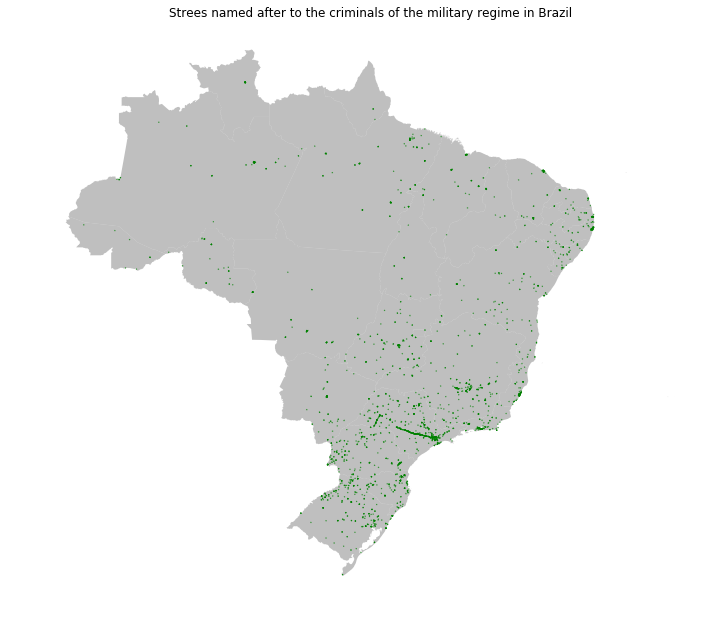

In [49]:
# Plotting streets that contain the names of criminals of the military regime in Brazil
ax = brazil.plot(figsize=(12,12),color='grey',linewidth=0)
streets[streets['name'].isin(dictatorship_criminals_streets)].plot(
    figsize=(12,12),color='green',alpha=0.7,linewidth=1.2,ax=ax)
ax.axis('off')
ax.set_title("Strees named after to the criminals of the military regime in Brazil")

NameError: name 'missing_killed_streets' is not defined

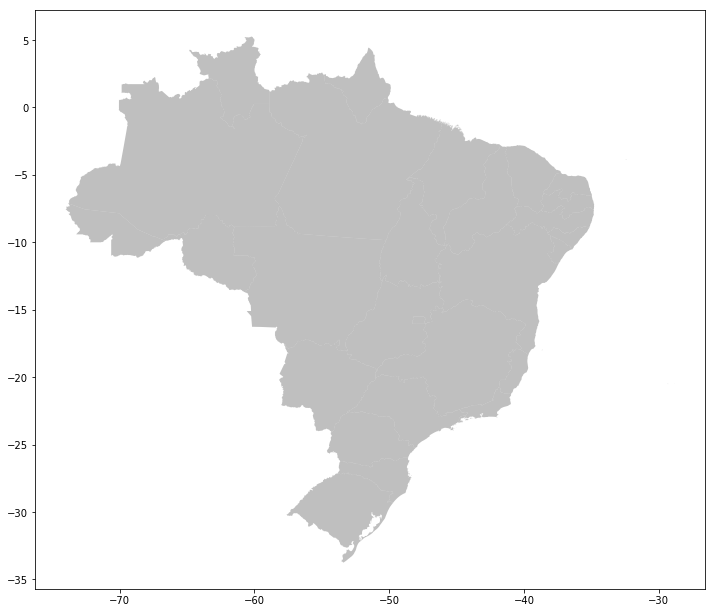

In [50]:
# Plotting streets that contain the names of missed and killed people during the military regime in Brazil
#ax = brazil.plot(figsize=(12,12),color='gray',linewidth=0)
#streets[streets['name'].isin(missing_killed_streets)].plot(
#    figsize=(12,12),color='red',alpha=0.7,linewidth=1.2,ax=ax)
#ax.axis('off')
#ax.set_title("Streets named after the missing and killed of the military regime in Brazil")

In [ ]:
#ax = brazil.plot(figsize=(12,12),color='gray',linewidth=0)
#streets[streets['name'].isin(missing_killed_streets)].plot(
#    figsize=(12,12),color='red',alpha=1,linewidth=1.2,ax=ax)
#streets[streets['name'].isin(dictatorship_criminals_streets)].plot(
#    figsize=(12,12),color='green',alpha=1,linewidth=1.2,ax=ax)
#ax.axis('off')


In [ ]:
missing_killed_df = streets[streets['name'].isin(missing_killed_streets)]

In [ ]:
dictatorship_criminals_df = streets[streets['name'].isin(dictatorship_criminals_streets)]

In [ ]:
missing_killed_df.to_file('missing_kiled_map_shp')

In [ ]:
dictatorship_criminals_df.to_file('dictatorship_criminals_map_shp')